<div style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی اصفهان - دانشکده علوم ریاضی
            </font>
			<p></p>
			<font color=blue>
مبانی ریاضی علوم داده
            </font>
			<br />
			<br />
پاییز ۱۴۰۱
		</div>
		<hr/>
		<font color=red size=6>
			<br />
			<div align=center>	
مینی‌پروژه‌ی ۲ (بهترین زیرفضای تقریب‌زننده و تجزیه‌ی مقدار تکین)
            </div>
		</font>
		<br />
		<hr />
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>
		<div>
			<h3>فهرست مطالب</h3>
			<ul style="margin-right: 0;">
                <li>
					<a href="#1st">
                       Power Method
                    </a>
				</li>
                <li>
					<a href="#2nd">
                       استفاده از کاهش بعد
                    </a>
				</li>
                <li>
					<a href="#3rd">
                       جلوه‌ای از کاهش بعد (SVD)
                    </a>
				</li>
                <li>
					<a href="#4th">
                       جلوه‌ای از کاهش بعد (PCA) 
                    </a>
				</li>
			</ul>
		</div>
	</font>
</div>

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
<br/>
ابتدا باید کتابخانه های زیر را "import" کنیم:
<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <li>numpy: برای کار با ماتریس ها</li>
        <li>matplotlib: برای رسم نمودار</li>
        <li>sklearn.decomposition.PCA: برای کاهش بعد</li>
        <li>scipy: برای تولید پایه اورتونرمال </li>
    </ul>
</p>
	</font>
</div>

In [9]:
######## Code here!
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import special_ortho_group as sog
import scipy as sc

<p></p>
<br />
<div id="1st" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
Power Method
        </font>
		<p></p>
		<hr>
الگوریتم Power Method را برای محاسبه‌ی مقدار ویژه و بردار ویژه‌ی اول ماتریس زیر پیاده‌سازی کنید. تعداد پیمایش‌ها (به عبارتی توان ماتریس B در رابطه‌ی Power Method ) را برابر 100 قرار دهید. توجه شود که استفاده از تابع آماده‌ی Power Method مجاز نیست.<br/>
$$
B =
\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 0 \\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 0 & 0 \\
4 & 5 & 6 & 7 & 8 & 9 & 10 & 0 & 0 & 0 \\
5 & 6 & 7 & 8 & 9 & 10 & 0 & 0 & 0 & 0 \\
6 & 7 & 8 & 9 & 10 & 0 & 0 & 0 & 0 & 0 \\
7 & 8 & 9 & 10 & 0 & 0 & 0 & 0 & 0 & 0 \\
8 & 9 & 10 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
9 & 10 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
10 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 
\end{pmatrix}
$$
        <br/><br/>
	</font>
</div>

In [10]:
######## Code here!
def powerMethod(B, x, power = 100):
    y = x
    for i in range(power):
        y = np.dot(B, y)
        eigen_value = np.linalg.norm(y)
        y = y / eigen_value
    return eigen_value, y

B = np.array([
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    [2, 3, 4, 5, 6, 7, 8, 9, 10, 0],
    [3, 4, 5, 6, 7, 8, 9, 10, 0, 0],
    [4, 5, 6, 7, 8, 9, 10, 0, 0, 0],
    [5, 6, 7, 8, 9, 10, 0, 0, 0, 0],
    [6, 7, 8, 9, 10, 0, 0, 0, 0, 0],
    [7, 8, 9, 10, 0, 0, 0, 0, 0, 0],
    [8, 9, 10, 0, 0, 0, 0, 0, 0, 0],
    [9, 10, 0, 0, 0, 0, 0, 0, 0, 0],
    [10, 0, 0, 0, 0, 0, 0, 0, 0, 0],   
])
power = 100
x = np.ones(10) / np.sqrt(10)
print(powerMethod(B, x, power))

(43.43043275068864, array([0.3197506 , 0.36962502, 0.39811309, 0.4039189 , 0.38728043,
       0.3499587 , 0.29512626, 0.22716239, 0.15136864, 0.07362363]))


<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
روش پیاده‌سازی شده در قسمت قبل را طوری تغییر دهید که بتواند 5 مقدار ویژه‌ی اول و بردار ویژه‌ی اول را به دست بیاورد. برای این منظور 5 بردار تصادفی تولید کنید و یک پایه‌ی اورتونرمال برای فضای span شده توسط این 5 بردار پیدا کنید. سپس هر یک از بردارهای پایه‌ی اورتونرمال را در ماتریس B ضرب کنید. سپس یک پایه‌ی اورتونرمال برای بردارهای حاصل به دست آورید. در نهایت الگوریتم قسمت قبل را برای اعضای پایه‌ی به دست آمده اجرا کنید.
برای تولید پایه‌ی اورتونرمال برای مجموعه‌ای از بردارها از تابع scipy.linalg.orth استفاده کنید. 
        </li>
<br/>
	</font>
</div>

In [11]:
######## Code here!
f_v = np.random.rand(4, 10)
b = sc.linalg.orth(f_v)
b = np.concatenate((b, np.zeros((4, 6))), axis = 1)
f_v_prime = b @ B
b_prime = sc.linalg.orth(f_v_prime)
b_prime = np.concatenate((b_prime, np.zeros((4, 6))), axis = 1)
print(b_prime)

[[ 0.84195362 -0.37350929  0.38676267 -0.04493944  0.          0.
   0.          0.          0.          0.        ]
 [-0.11579293 -0.72690733 -0.50260904 -0.45341138  0.          0.
   0.          0.          0.          0.        ]
 [ 0.51657372  0.35412991 -0.76527575  0.14864933  0.          0.
   0.          0.          0.          0.        ]
 [-0.10420022 -0.45463013 -0.11023529  0.87766847  0.          0.
   0.          0.          0.          0.        ]]


# ##################################################################

<p></p>
<br/>
<div id="2nd" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
استفاده از کاهش بعد
        </font>
		<p></p>
		<hr>
<br/>
<p style='direction:rtl; text-align: right'>
    برای تولید دیتا با استفاده از پایه اورتونرمال
    عملیات زیر را انجام دهید:
    <ul style='direction:rtl; text-align: right'>
        <li>ابتدا با استفاده از تابع np.zeros یک آرایه با ابعاد N در dim بسازید. نام متغیر نظیر آرایه را alpha بگذارید.</li>
        <li>درایه‌های سطر i در alpha را با یک توزیع نرمال با میانگین ۰ و انحراف معیار i + 1 مقداردهی کنید.</li>
        <li>بردار پایه V را با استفاده از تابع scipy.stats.special_ortho_group.rvs(dim) بسازید.</li>
        <li>حال متغیر alpha_V را تعریف کنید و برابر ضرب ماتریس alpha در V قرار دهید.</li>
    </ul>
	</font>
</div>

In [12]:
dim = 20
N = 1000
######## Code here!
alpha = np.zeros((N, dim))

for i in range(N):
    alpha[i] = np.random.normal(0, i + 1, dim)

V = sog.rvs(dim)
alpha_v = np.matmul(alpha, V)
print(alpha_v)

[[ 2.19291350e+00  1.28140534e-02  1.36626009e-01 ...  2.44941623e-01
   1.64168689e+00 -3.74176693e-01]
 [-1.86772622e+00  1.60091898e+00  1.15672630e+00 ...  2.64252579e+00
  -8.21890473e-01 -3.08005304e-01]
 [ 5.69626361e+00  1.34717439e+00 -2.37028640e+00 ... -1.14192794e+00
  -4.05756687e+00  1.01943256e+00]
 ...
 [ 3.44731019e+02  8.99880182e+02  1.85901722e+03 ...  1.02707688e+03
  -2.00558721e+03 -9.95891024e+02]
 [-1.51956419e+02  3.55524124e+02 -2.08020611e+03 ...  1.25561932e+02
  -5.57405393e+02 -1.82693363e+03]
 [ 7.07762357e+01  1.86128379e+03  1.34891099e+03 ... -3.92901447e+02
  -3.17712485e+02 -4.95075015e+02]]


<p></p>
<br/>
<div id="5th" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
        </font>
		<p></p>
		<hr>
<br/>
<p style='direction:rtl; text-align: right'>
    استفاده از PCA برای کاهش بعد
    <ul style='direction:rtl; text-align: right'>
        <li>ابتدا یک شیی از PCA بسازید.</li>
        <li>با استفاده از تابع fit موجود در شیی PCA عملیات pca را روی دیتا alpha_v انجام دهید.</li>
        <li> با استفاده از ویژگی components_ موجود در شیی pca بردار های تکین را مشاهده کنید.</li>
        <li> با استفاده از ویژگی explained_variance_ موجود در شیی pca مقدار های تکین را مشاهده کنید.</li>
    </ul>
	</font>
</div>

In [13]:
######## Code here!
pca = PCA()
pca.fit(alpha_v)
print(pca.components_)
print(pca.explained_variance_)

[[-2.05517803e-01  4.61241893e-01 -3.86955792e-02 -1.12227138e-01
  -5.80959652e-02  1.58000841e-01 -5.00846500e-01 -5.19070187e-02
  -3.31667392e-01 -5.37389825e-02  2.51887706e-01 -2.99189259e-02
   9.35115206e-02 -3.90652680e-01 -5.77419883e-02 -1.74738144e-01
  -2.53477547e-01  1.00929149e-01  4.52399317e-02 -1.02822115e-02]
 [-7.44142665e-02  1.58252384e-01 -3.68240872e-01 -3.34996577e-02
  -3.62333294e-01  2.56451139e-01  9.13560062e-02 -3.37398134e-02
   4.17723553e-01  6.22147933e-02  1.65054279e-01  1.79016664e-01
   3.50999323e-01  8.29124766e-02  4.38266894e-01 -1.42850766e-01
   4.15312712e-02 -1.30310161e-02 -1.00373904e-01  1.84325574e-01]
 [ 1.39419236e-01  2.84378929e-01 -2.61659439e-02 -4.67873137e-01
  -8.93634490e-02  8.51941148e-02  2.91032196e-01 -2.57997213e-01
  -9.49261794e-02  1.10250785e-02 -2.74813613e-01 -1.40433257e-01
   3.85463715e-01 -2.64470551e-02 -2.22646092e-01  2.04827632e-01
   2.60007974e-02 -2.43792828e-01 -8.20059505e-02 -3.18708222e-01]
 [ 2.93

<p></p>
<br/>
<div id="5th" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
        </font>
		<p></p>
		<hr>
<br/>
<p style='direction:rtl; text-align: right'>
    کاهش بعد به ۳ بعد
    <ul style='direction:rtl; text-align: right'>
        <li>ابتدا یک شیی از PCA با ورودی n_components=3 بسازید.</li>
        <li>با استفاده از تابع fit موجود در شیی PCA عملیات pca را روی دیتا alpha_v انجام دهید.</li>
        <li> ویژگی explained_variance_ratio_ موجود در شیی pca درصد حفظ دیتا به ازای هر کدام از بعد ها را می دهد.</li>
    </ul>
	</font>
</div>

In [14]:
######## Code here!
pca = PCA(n_components = 3)
pca.fit(alpha_v)
print(str(100 * np.sum(pca.explained_variance_ratio_)) + " percent of data is preserved in 3 dimensions!")

19.896789261509877 percent of data is preserved in 3 dimensions!


<p></p>
<br/>
<div id="5th" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
        </font>
		<p></p>
		<hr>
<br/>
<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
با کاهش بعد به ۳، چند درصد از اطلاعات حفظ می شود؟
    </ul>
	</font>
</div>

### Answer here!
<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
اینجا بنویسید...</li>
<br/>
	</font>
</div>

<p></p>
<br/>
<div id="5th" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
        </font>
		<p></p>
		<hr>
<br/>
<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
به کمک یک حلقه مقدار n_components مناسب برای حفظ 90 درصد از اطلاعات را به دست آورید.
        </ul>
	</font>
</div>

In [15]:
######## Code here!
min_dim = 0
for i in range(1, dim):
    pca = PCA(n_components = i)
    pca.fit(alpha_v)
    if (np.sum(pca.explained_variance_ratio_) >= 0.9):
        min_dim = i
        break
print("Almost " + str(100 * np.sum(pca.explained_variance_ratio_)) + " percent of data is preserved in at least " + str(min_dim) + " dimensions!")

Almost 93.03579930007515 percent of data is preserved in at least 18 dimensions!


<p></p>
<br/>
<div id="5th" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
        </font>
		<p></p>
		<hr>
<br/>
<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
برای حفظ ۹۰ درصد از اطلاعات به چند بعد نیاز داریم؟
    </ul>
	</font>
</div>

### Answer here!
<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
اینجا بنویسید...</li>
<br/>
	</font>
</div>

# ##################################################################

<p></p>
<br/>
<div id="3rd" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
جلوه‌ای از کاهش بعد (SVD)
        </font>
		<p></p>
		<hr>
<br/>
مسئله‌ی کاهش بعد و تجزیه‌ی مقدار تکین در فشرده‌سازی تصاویر کاربرد دارد. هدف این بخش مشاهده‌ی تاثیر مقادیر تکین در حفظ وضوح تصاویر است.
<br/><br/>
	</font>
</div>

<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
<br/>
<p style='direction:rtl; text-align: right'>تذکر: در این قسمت پروژه می‌خواهیم با تصاویر کار کنیم. برای کار با تصاویر به کتابخانه‌ی cv2 نیاز داریم. اگر کتابخانه cv2 اجرا نشد باید آن را نصب کنید. برای نصب کتابخانه در command prompt دستور زیر را اجرا کنید.
</p>
<p style='direction:rtl; text-align: left'> pip install opencv-python
</p>
<p style='direction:rtl; text-align: right'>و یا از طریق اجرای کد زیر اقدام به نصب نمایید.
</p>
	</font>
</div>

In [16]:
!pip install opencv-python

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
<br/>
کتابخانه‌ی cv2 را "import" می‎کنیم:
	</font>
</div>

In [17]:
import cv2

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
برای این منظور مراحل زیر را انجام دهید:
        <p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <font face="B Nazanin" size=5>
        <li>با استفاده از تابع imread موجود در کتابخانه <a href="https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/">OpenCV</a> فایل تصویر deadpool.jpg را بخوانید و در متغیری با نام image بریزید.</li>
    </ul>
</p>
	</font>
</div>
        </li>
<br/>
	</font>
</div>

In [18]:
######## Code here!
image = cv2.imread("deadpool.jpg")

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
تابع imread تصویر را با فرمت BGR می‌خواند. در حالی که کتابخانه‌ی matplotlib برای نمایش تصویر از فرمت RGB استفاده می‌کند. پس برای اینکه تصویر درست نمایش داده شود باید با استفاده از تابع زیر آن را به فرمت RGB تبدیل کرد. در ادامه با فرمت RGB آشنا می‌شوید.
    </font>
</div>

In [19]:
######## Code here!
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <font face="B Nazanin" size=5>
        <li>برای نمایش تصویر ابتدا تابع imshow را با تصویر ورودی که در قسمت قبل به دست آمد فراخوانی می‌کنیم و سپس تابع show را فراخوانی می‌کنیم. توجه کنید که هر دو تابع از کتابخانه‌ی matplotlib هستند.</li>
    </ul>
</p>
	</font>

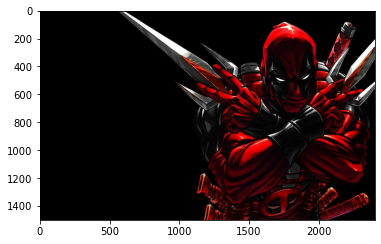

In [20]:
######## Code here!
plt.imshow(image)
plt.show()

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
هر تصویر رنگی با ابعاد m در n را می‌توان به شکل سه ماتریس نظیر کانال‌های رنگی قرمز(R)، سبز (G) و آبی (B) با ابعاد m در n تصویر تعبیر کرد. در واقع نحوه خواندن و ذخیره تصویر در حافظه به همین صورت است. 
    </font>
</div>

In [21]:
dim = image.shape
print('Image shape = ', dim)

Image shape =  (1500, 2400, 3)


<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
همانطور که می‌بینید عکس خوانده شده به ازای هر پیکسل ۳ عدد دارد. بنابراین برای هر عکس رنگی $m\times n$ یک آرایه $m\times n\times 3$ خواهیم داشت. 
 از آنجایی که الگوریتم SVD روی یک ماتریس m در n عمل می‌کند لازم است که الگوریتم را روی ماتریس‌های هر سه کانال رنگی اجرا کنیم. پس ماتریس‌های نظیر هر یک از کانال‌های رنگی را از تصویر اصلی استخراج می‌کنیم.
	</font>
</div>

<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <font face="B Nazanin" size=5>
        <li>برای این منظور سه ماتریس رنگ را در ماتریس‌های R و G و B ذخیره کنید.</li>
    </ul>
</p>
	</font>

In [22]:
######## Code here!
R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]
print(R.shape)
print(G.shape)
print(B.shape)

(1500, 2400)
(1500, 2400)
(1500, 2400)


<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <font face="B Nazanin" size=5>
        <li>با استفاده از تابع svd در ماژول linalg کتابخانه‌ی svd، مقادیر U, sigma, Vنظیر تجزیه‌ی مقدار تکین هر سه ماتریس متناظر کانال‌های رنگی را به دست آورید. برای این منظور از لینک مقابل استفاده کنید. <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html">np.linalg.svd</a></li>
    </ul>
</p>
	</font>



In [23]:
######## Code here!
u_r, sigma_r, v_r = np.linalg.svd(R, full_matrices = False)
u_g, sigma_g, v_g = np.linalg.svd(G, full_matrices = False)
u_b, sigma_b, v_b = np.linalg.svd(B, full_matrices = False)

<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <font face="B Nazanin" size=5>
        <li>به کمک لینک زیر هر یک از ماتریس‌های نظیر کانال‌های اصلی رنگ را با به ترتیب 1، 5، 10، 25، 50. <a href="https://www.geeksforgeeks.org/image-reconstruction-using-singular-value-decomposition-svd-in-python/">np.linalg.svd</a></li>
    </ul>
</p>
	</font>

In [24]:
######## Code here!
n_comps = int(0.05 * R.shape[1])

low_rank_r = u_r[:, :n_comps] @ np.diag(sigma_r[:n_comps]) @ v_r[:n_comps, :]
low_rank_g = u_g[:, :n_comps] @ np.diag(sigma_g[:n_comps]) @ v_g[:n_comps, :]
low_rank_b = u_b[:, :n_comps] @ np.diag(sigma_b[:n_comps]) @ v_b[:n_comps, :]

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
با استفاده از تابع dstack موجود در کتابخانه‌ی numpy سه آرایه‌ی به دست آمده در مرحله قبل را به هم بچسبانید و در متغیر low_rank بریزید.
    </font>
</div>

In [25]:
######## Code here!
low_rank = np.dstack((low_rank_r, low_rank_g, low_rank_b))

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
با استفاده از دستور astype موجود در reduced_image ماتریس بدست آمده را به عدد صحیح تبدیل کنید و در متغیر final_image تا برای نمایش آماده شود.
    </font>
</div>

In [26]:
######## Code here!
low_rank = low_rank.astype(int)

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
تصویر را نمایش دهید.
    </font>
</div>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


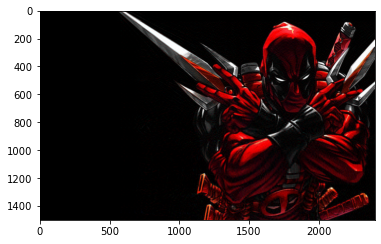

In [27]:
######## Code here!
plt.imshow(low_rank)
plt.show()

# ##################################################################

<p></p>
<br />
<div id="4th" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
جلوه‌ای از کاهش بعد (PCA)
        </font>
		<p>مشابه بخش قبل در این قسمت می‌خواهیم با استفاده از الگوریتم PCA اقدام به کاهش بعد دیتای تصاویر کنیم.</p>
		<hr><br/>
	</font>
</div>

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>خواندن فایل تصویر
		<p></p>
		<hr>
<p style='direction:rtl; text-align: right'>با استفاده از تابع imread موجود در کتابخانه <a href="https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/">OpenCV</a> فایل تصویر deadpool.jpg را بخوانید و در متغیری با نام image بریزید.</p>
	</font>
</div>

In [28]:
######## Code here!
image = cv2.imread("deadpool.jpg")

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
تابع imread تصویر را با فرمت BGR می‌خواند. در حالی که کتابخانه‌ی matplotlib برای نمایش تصویر از فرمت RGB استفاده می‌کند. پس برای اینکه تصویر درست نمایش داده شود باید با استفاده از تابع زیر آن را به فرمت RGB تبدیل کرد. در ادامه با فرمت RGB آشنا می‌شوید.
    </font>
</div>

In [29]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>نمایش تصویر
		<p></p>
		<hr>
<p style='direction:rtl; text-align: right'>
برای نمایش تصویر ابتدا تابع imshow را با تصویر ورودی که در قسمت قبل به دست آمد فراخوانی می‌کنیم و سپس تابع show را فراخوانی می‌کنیم. توجه کنید که هر دو تابع از کتابخانه‌ی matplotlib هستند.
</p>
	</font>
</div>

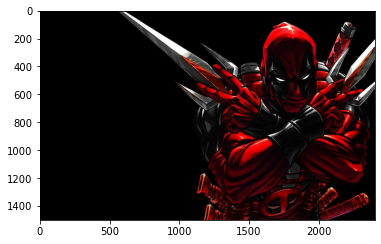

In [30]:
######## Code here!
plt.imshow(image)
plt.show()

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>آماده سازی تصویر برای کاهش بعد
		<p></p>
		<hr>
هر تصویر رنگی با ابعاد m در n را می‌توان به شکل سه ماتریس نظیر کانال‌های رنگی قرمز(R)، سبز (G) و آبی (B) با ابعاد m در n تصویر تعبیر کرد. در واقع نحوه خواندن و ذخیره تصویر در حافظه به همین صورت است. 
	</font>
</div>

In [31]:
dim = image.shape
print('Image shape = ', dim)

Image shape =  (1500, 2400, 3)


<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
همانطور که می‌بینید عکس خوانده شده به ازای هر پیکسل ۳ عدد دارد. بنابراین برای هر عکس رنگی $m\times n$ یک آرایه $m\times n\times 3$ خواهیم داشت.
	</font>
</div>

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
 از آنجایی که الگوریتم PCA روی یک ماتریس m در n عمل می‌کند لازم است که الگوریتم را روی ماتریس‌های هر سه کانال رنگی اجرا کنیم. پس ماتریس‌های نظیر هر یک از کانال‌های رنگی را از تصویر اصلی استخراج می‌کنیم. برای این منظور سه ماتریس رنگ را در ماتریس‌های R و G و B ذخیره کنید.
	</font>
</div>

In [32]:
######## Code here!
R = image[:, :, 0]
G = image[:, :, 1]
B = image[:, :, 2]
print(R.shape)
print(G.shape)
print(B.shape)

(1500, 2400)
(1500, 2400)
(1500, 2400)


<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>استفاده از PCA برای کاهش بعد
		<p></p>
		<hr>    
با استفاده از کلاس PCA در کتابخانه sklearn کاهش بعد را انجام می‌دهیم. حتما لینک زیر را مطالعه کنید تا با نحوه‌ی تعریف شیئ PCA و نحوه‌ی استفاده از آن آشنا شوید.
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">لینک</a>
<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
    </ul>
</p>
	</font>
</div>

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
        <li>برای هر یک از ماتریس های R,G,B یک شیئ PCA ایجاد کنید و در متغیرهای rpca, gpca, bpca ذخیره کنید. n_components را برابر ۱۰ قرار دهید.</li>
	</font>
</div>

In [33]:
######## Code here!
k = 10
rpca = PCA(n_components = k)
gpca = PCA(n_components = k)
bpca = PCA(n_components = k)

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
        <li>با استفاده از تابع fit موجود در هر شیئ PCA الگوریتم را روی ماتریس‌های R,G,B فیت کنید.</li>
	</font>
</div>

In [34]:
######## Code here!
rpca.fit(R)
gpca.fit(G)
bpca.fit(B)

PCA(n_components=10)

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
        <li> با استفاده از متغیر _explained_variance_ratio موجود در هر شیئ می‌توانید ببینید هرکدام از مولفه ها چند درصد دیتای ماتریس را دارند. مشخص کنید که مجموعا در ده مولفه اول چند درصد دیتا برای هر کدام از ماتریس‌ها حفظ شده اند.</li>
	</font>
</div>

In [35]:
######## Code here!
print("First " + str(k) + " components of Red Matrix have " + str(100 * np.sum(rpca.explained_variance_ratio_)) + " percent of data.")
print("First " + str(k) + " components of Green Matrix have " + str(100 * np.sum(gpca.explained_variance_ratio_)) + " percent of data.")
print("First " + str(k) + " components of Blue Matrix have " + str(100 * np.sum(bpca.explained_variance_ratio_)) + " percent of data.")

First 10 components of Red Matrix have 60.1049444987452 percent of data.
First 10 components of Green Matrix have 63.54553344005501 percent of data.
First 10 components of Blue Matrix have 63.8904184439794 percent of data.


<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
        <li> با استفاده از دستور bar در matplotlib نمودار میله‌ای مقادیر _explained_variance_ratio را برای کانال قرمز رسم کنید. برای آشنایی با نحوه‌ی رسم نمودار میله‌ای (bar) از لینک مقابل استفاده کنید. <a href="https://www.geeksforgeeks.org/bar-plot-in-matplotlib/">لینک</a></li>
	</font>
</div>

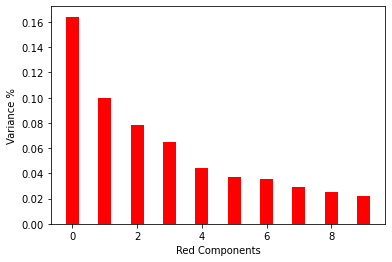

In [36]:
######## Code here!
plt.bar([i for i in range(k)], rpca.explained_variance_ratio_, color ='red', width = 0.4)
plt.xlabel("Red Components")
plt.ylabel("Variance %")
plt.show()

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
        <li> با استفاده از دستور bar در matplotlib مقادیر _explained_variance_ratio را برای کانال سبز رسم کنید. </li>
	</font>
</div>

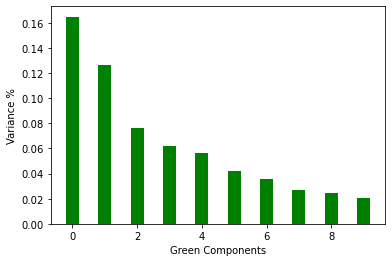

In [37]:
######## Code here!
plt.bar([i for i in range(k)], gpca.explained_variance_ratio_, color ='green', width = 0.4)
plt.xlabel("Green Components")
plt.ylabel("Variance %")
plt.show()

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
        <li> با استفاده از دستور bar در matplotlib مقادیر _explained_variance_ratio را برای کانال آبی رسم کنید. </li>
	</font>
</div>

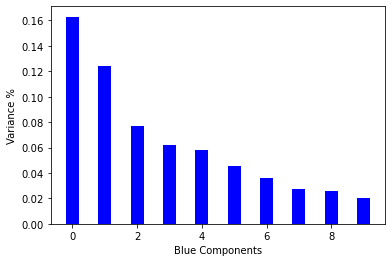

In [38]:
######## Code here!
plt.bar([i for i in range(k)], bpca.explained_variance_ratio_, color ='blue', width = 0.4)
plt.xlabel("Blue Components")
plt.ylabel("Variance %")
plt.show()

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
		<hr>با استفاده از تابع transform موجود در rpca, gpca, bpca دیتا با بعد کمتر را تولید کنید و در سه متغیر r_transformed, g_transformed, b_transformed بریزید.
<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
    </ul>
</p>
	</font>
</div>

In [39]:
######## Code here!
Transform_R = rpca.transform(R)
Transform_B = gpca.transform(G)
Transform_G = bpca.transform(B)

In [40]:
print(Transform_R.shape)

(1500, 10)


<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
حال دیتای با بعد کمتر که در قسمت قبل به دست آمد را به تابع inverse_transform موجود در اشیا rpca, gpca, bpca بدهید تا دیتای بعد اولیه را بازتولید کند و سپس دیتای بازیابی شده را در متغیرهای reduced_r, reduced_b, reduced_g بریزید.
    </font>
</div>

In [41]:
######## Code here!
Reduced_R = rpca.inverse_transform(Transform_R)
Reduced_G = gpca.inverse_transform(Transform_G)
Reduced_B = bpca.inverse_transform(Transform_B)

In [42]:
print(Reduced_R.shape)

(1500, 2400)


In [43]:
print('Transform Matrix Shape = ', Transform_R.shape)
print('Inverse Transform Matrix Shape = ', Reduced_R.shape)

Transform Matrix Shape =  (1500, 10)
Inverse Transform Matrix Shape =  (1500, 2400)


<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
با استفاده از تابع reshape سه آرایه‌ی reduced_r, reduced_g, reduced_b که دارای ابعاد $x\times y$ هستند را به آرایه‌هایی با بعد $x\times y\times 1$ تبدیل کنید. 
    </font>
</div>

In [44]:
######## Code here!
Reduced_R = Reduced_R.reshape((dim[0], dim[1], 1))
Reduced_G = Reduced_G.reshape((dim[0], dim[1], 1))
Reduced_B = Reduced_B.reshape((dim[0], dim[1], 1))

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
با استفاده از تابع dstack موجود در کتابخانه‌ی numpy سه آرایه‌ی به دست آمده در مرحله قبل را به هم بچسبانید و در متغیر reduced_image بریزید.
    </font>
</div>

In [45]:
######## Code here!
reduced_image = np.dstack((Reduced_R, Reduced_G, Reduced_B))

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
با استفاده از دستور astype موجود در reduced_image ماتریس بدست آمده را به عدد صحیح تبدیل کنید و در متغیر final_image تا برای نمایش آماده شود.
    </font>
</div>

In [46]:
######## Code here!
final_image = reduced_image.astype(int)

In [47]:
print('final_image shape = ', final_image.shape)

final_image shape =  (1500, 2400, 3)


<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
تصویر را نمایش دهید.
    </font>
</div>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


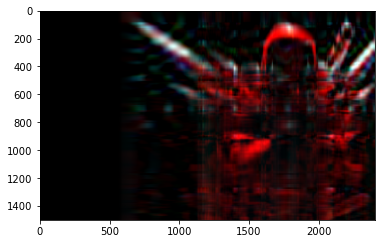

In [48]:
######## Code here!
plt.imshow(final_image)
plt.show()

<div id="sec_1" style="direction:rtl;line-height:300%;text-align:right">
	<font face="B Nazanin" size=5>
همه مراحل انجام شده از ابتدای این بخش را با تعداد مولفه‌ای (n_components) تکرار کنید که هر سه ماتریس R,G,B حداقل ۹۹ درصد داده‌ها حفظ شود. تعداد این مولفه‌ها حداقل چند است. 
    </font>
</div>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Transform Matrix Shape =  (1500, 199)
Inverse Transform Matrix Shape =  (1500, 2400)
final_image shape =  (1500, 2400, 3)


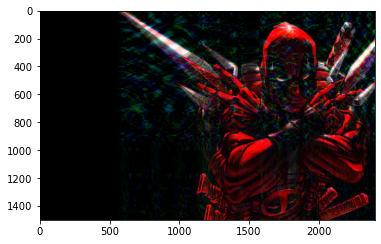

0.9900589518114286


In [49]:
######## Code here!

k = 199
rpca = PCA(n_components = k)
gpca = PCA(n_components = k)
bpca = PCA(n_components = k)

rpca.fit(R)
gpca.fit(G)
bpca.fit(B)

Transform_R = rpca.transform(R)
Transform_B = gpca.transform(G)
Transform_G = bpca.transform(B)
Reduced_R = rpca.inverse_transform(Transform_R)
Reduced_G = gpca.inverse_transform(Transform_G)
Reduced_B = bpca.inverse_transform(Transform_B)

print('Transform Matrix Shape = ', Transform_R.shape)
print('Inverse Transform Matrix Shape = ', Reduced_R.shape)

Reduced_R = Reduced_R.reshape((dim[0], dim[1], 1))
Reduced_G = Reduced_G.reshape((dim[0], dim[1], 1))
Reduced_B = Reduced_B.reshape((dim[0], dim[1], 1))

reduced_image = np.dstack((Reduced_R, Reduced_G, Reduced_B))
final_image = reduced_image.astype(int)
print('final_image shape = ', final_image.shape)
plt.imshow(final_image)
plt.show()
print(np.sum(rpca.explained_variance_ratio_))